In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from PIL import Image
from microrobot_dl.data_loader import ImageDataset2025

# Setup
DATA_DIR = "../data/2025_Dataset"

# Load Dataset
# Using multi_task=True to get both pose labels and depth values efficiently
dataset = ImageDataset2025(base_dir=DATA_DIR, multi_task=True, multi_label=False)
print(f"Dataset loaded. Total samples: {len(dataset)}")

Dataset loaded. Total samples: 2000


In [6]:
# Create DataFrame from dataset samples
data = []
# dataset.samples structure for multi_task=True: (img_path, pose_label_idx, depth_val)
for img_path, label_idx, depth_val in dataset.samples:
    label_str = dataset.idx_to_label[label_idx]
    data.append({"label": label_str, "depth": depth_val, "path": img_path})

df = pd.DataFrame(data)
print(f"DataFrame created with {len(df)} rows.")
df.head()

DataFrame created with 2000 rows.


,label,depth,path
0,P0_R0,0.415,../data/2025_Dataset/P0_R0/video_14_stable_bot...
1,P0_R0,0.302,../data/2025_Dataset/P0_R0/video_14_stable_bot...
2,P0_R0,0.294,../data/2025_Dataset/P0_R0/video_14_stable_bot...
3,P0_R0,0.297,../data/2025_Dataset/P0_R0/video_14_stable_bot...
4,P0_R0,0.299,../data/2025_Dataset/P0_R0/video_14_stable_bot...


In [3]:
# --- Analysis: Distribution, Mean Depth, Std Depth ---

# 1. Per Label Statistics
stats = df.groupby("label")["depth"].agg(["count", "mean", "std"]).reset_index()
stats.rename(
    columns={"count": "Count", "mean": "Mean Depth", "std": "Std Depth"}, inplace=True
)

print("=== Statistics per Label ===")
print(stats)

# 2. Overall Statistics
overall_mean = df["depth"].mean()
overall_std = df["depth"].std()
print("\n=== Overall Statistics ===")
print(f"Overall Mean Depth: {overall_mean:.4f}")
print(f"Overall Std Depth: {overall_std:.4f}")

=== Statistics per Label ===
      label  Count  Mean Depth  Std Depth
0     P0_R0     50     0.44618   0.356925
1    P10_R0     50     0.48298   0.304313
2    P15_R0     50     0.49190   0.331331
3   P15_R15     50     0.43480   0.329003
4   P15_R30     50     0.39652   0.298247
5   P15_R45     50     0.46982   0.288909
6    P15_R5     50     0.39528   0.323437
7    P25_R0     50     0.37776   0.283661
8    P30_R0     50     0.33026   0.272032
9   P30_R10     50     0.40608   0.301654
10  P30_R15     50     0.36976   0.295352
11  P30_R30     50     0.62104   0.361125
12  P30_R45     50     0.31278   0.262947
13   P30_R5     50     0.37330   0.283708
14  P30_R60     50     0.44572   0.298630
15   P35_R0     50     0.55952   0.327961
16   P40_R0     50     0.40510   0.302582
17   P45_R0     50     0.35118   0.262136
18  P45_R10     50     0.45062   0.331991
19  P45_R15     50     0.35862   0.282656
20  P45_R30     50     0.49966   0.349611
21  P45_R45     50     0.45140   0.307464
22   

Plotting sample images for 40 labels...


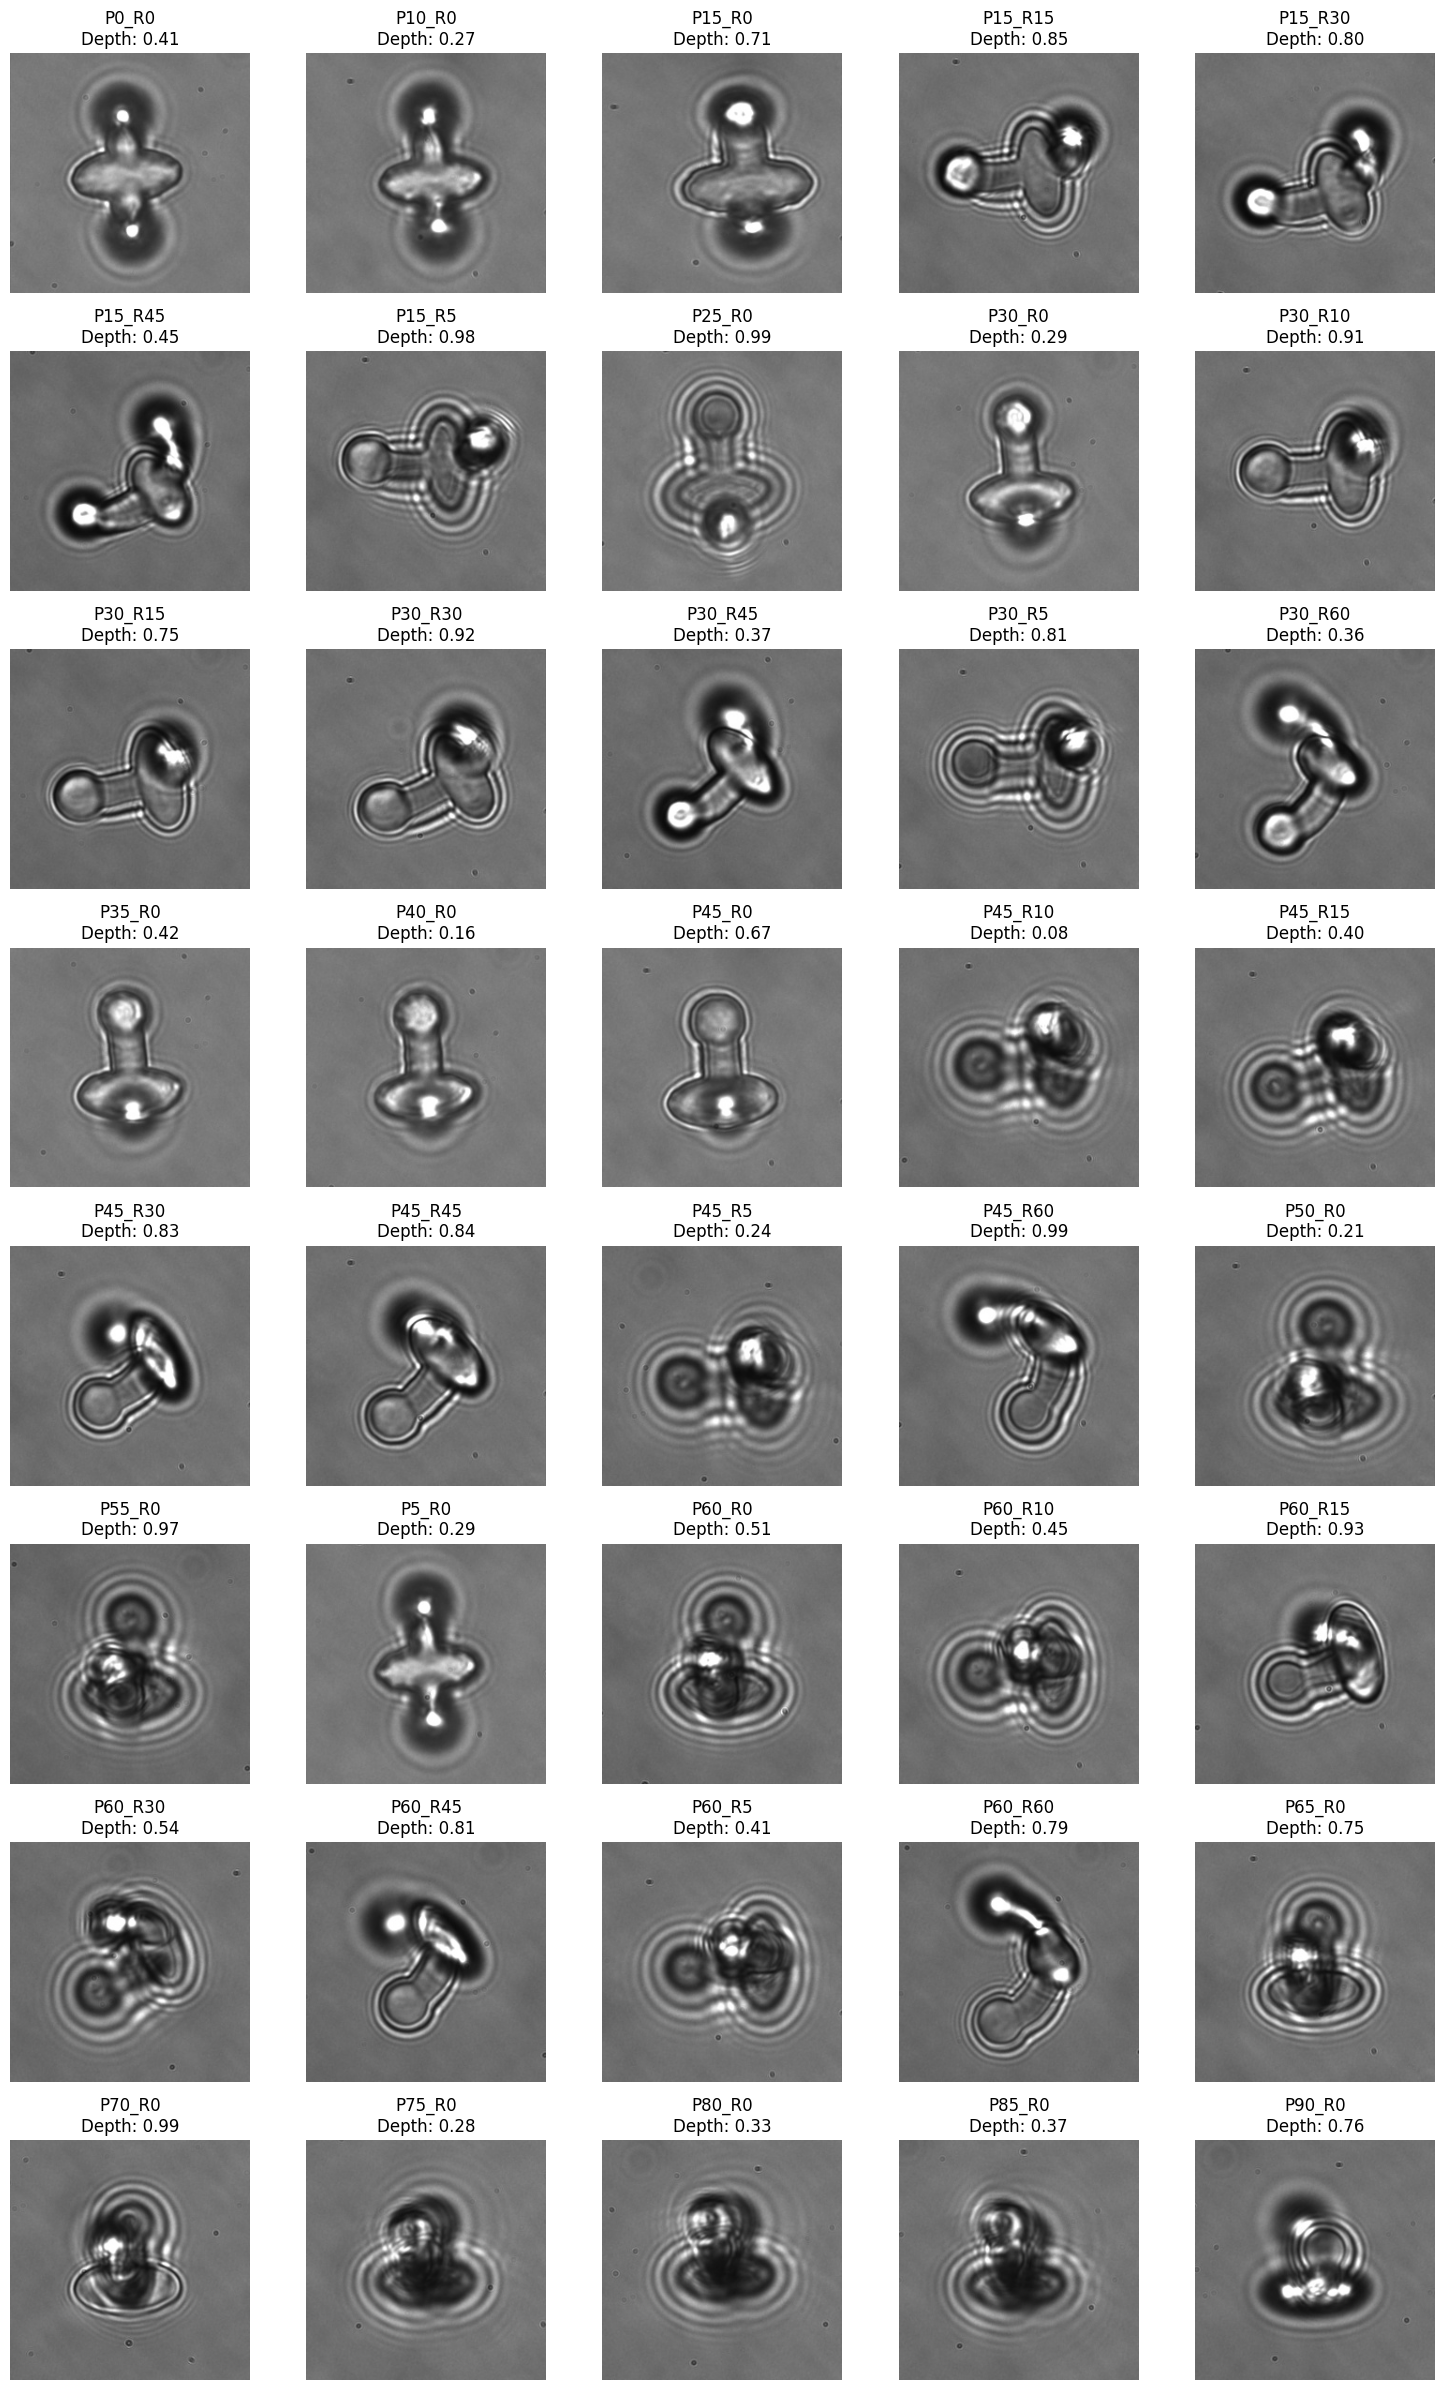

In [4]:
# --- Visualization: Sample Image per Label ---

unique_labels = sorted(df["label"].unique())
num_labels = len(unique_labels)
cols = 5
rows = math.ceil(num_labels / cols)

fig, axes = plt.subplots(rows, cols, figsize=(15, 3 * rows))
axes = axes.flatten()

print(f"Plotting sample images for {num_labels} labels...")

for i, label in enumerate(unique_labels):
    # Sample one image for this label
    sample_row = df[df["label"] == label].iloc[0]
    img_path = sample_row["path"]

    # Read image
    img = Image.open(img_path)

    ax = axes[i]
    ax.imshow(img, cmap="gray")
    ax.set_title(f"{label}\nDepth: {sample_row['depth']:.2f}")
    ax.axis("off")

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()